# PROYECTO 1
 * Guido Margiotta
 * Juan Morales

## Importando librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [123]:
sns.set()

## Obteniendo datos Argentina:
    
    * Base de datos de inflación mensual por sectores
    * Base de datos de inflación anual por sectores
    * Creación de MultiIndex (Año, Mes)
    * Tasas de intervención


In [2]:
inflacion_arg_men = pd.read_excel("Inflación Argentina.xlsx",sheet_name = "Inflacion mensual por sector")
inflacion_arg_men.head()

,Periodo,Año_mes,nivel_general_mensual,alimentos_bebidas_no_alc_mensual,alcohol_tabaco_mensual,vestimenta_mensual,vivienda_mensual,hogar_mensual,salud_mensual,transporte_mensual,comunicación_mensual,recreacion_mensual,educacion_mensual,restaurantes_hoteles_mensual,bienes_servicios_varios_mensual
0,2017-01-01,2017.01,1.6,1.3,0.9,-1.0,1.5,0.9,2.4,2.1,3.1,3.2,0.8,3.1,1.9
1,2017-02-01,2017.02,2.1,1.8,4.3,-0.2,5.4,0.4,2.7,1.9,4.1,0.6,3.2,1.7,1.8
2,2017-03-01,2017.03,2.4,2.8,1.9,3.4,3.6,0.8,2.0,1.2,3.2,1.7,10.9,1.0,1.8
3,2017-04-01,2017.04,2.7,2.2,2.4,4.5,5.9,1.1,1.8,0.6,6.8,2.6,2.9,1.9,1.8
4,2017-05-01,2017.05,1.4,1.3,1.7,1.7,1.8,2.8,1.5,0.9,0.3,0.7,1.7,1.5,1.3


In [3]:
inflacion_arg_men.set_index("Periodo", inplace=True)
inflacion_arg_men.head()

,Año_mes,nivel_general_mensual,alimentos_bebidas_no_alc_mensual,alcohol_tabaco_mensual,vestimenta_mensual,vivienda_mensual,hogar_mensual,salud_mensual,transporte_mensual,comunicación_mensual,recreacion_mensual,educacion_mensual,restaurantes_hoteles_mensual,bienes_servicios_varios_mensual
Periodo,,,,,,,,,,,,,,
2017-01-01,2017.01,1.6,1.3,0.9,-1.0,1.5,0.9,2.4,2.1,3.1,3.2,0.8,3.1,1.9
2017-02-01,2017.02,2.1,1.8,4.3,-0.2,5.4,0.4,2.7,1.9,4.1,0.6,3.2,1.7,1.8
2017-03-01,2017.03,2.4,2.8,1.9,3.4,3.6,0.8,2.0,1.2,3.2,1.7,10.9,1.0,1.8
2017-04-01,2017.04,2.7,2.2,2.4,4.5,5.9,1.1,1.8,0.6,6.8,2.6,2.9,1.9,1.8
2017-05-01,2017.05,1.4,1.3,1.7,1.7,1.8,2.8,1.5,0.9,0.3,0.7,1.7,1.5,1.3


In [4]:
inflacion_arg_anual = pd.read_excel("Inflación Argentina.xlsx",sheet_name = "Inflacion anual por sector")
inflacion_arg_anual.head()

,Periodo,Año_mes,nivel_general_anual,alimentos_bebidas_anual,alcohol_tabaco_anual,vestimenta_anual,servicios_vivienda_anual,hogar_anual,salud_anual,transporte_anual,comunicacion_anual,recreacion_anual,educacion_anual,restaurantes_hoteles_anual,bienes_servicios_varios_anual
0,2017-12-01,2017.12,24.8,20.4,23.7,16.6,55.6,17.4,27.8,20.6,34.1,22.8,31.5,22.1,19.8
1,2018-01-01,2018.01,25.0,21.3,25.4,16.9,54.9,17.6,27.1,20.7,32.6,23.1,31.3,21.9,20.4
2,2018-02-01,2018.02,25.4,21.7,22.3,16.4,52.5,19.1,26.6,23.8,39.0,23.6,29.7,22.4,20.3
3,2018-03-01,2018.03,25.4,21.2,20.8,17.4,48.0,23.5,25.8,24.6,38.4,23.0,33.0,23.3,20.4
4,2018-04-01,2018.04,25.5,19.9,19.5,16.9,51.0,23.7,25.8,28.8,30.9,22.2,30.3,23.7,20.3


In [5]:
inflacion_arg_anual.set_index("Periodo", inplace=True)
inflacion_arg_anual.head()

,Año_mes,nivel_general_anual,alimentos_bebidas_anual,alcohol_tabaco_anual,vestimenta_anual,servicios_vivienda_anual,hogar_anual,salud_anual,transporte_anual,comunicacion_anual,recreacion_anual,educacion_anual,restaurantes_hoteles_anual,bienes_servicios_varios_anual
Periodo,,,,,,,,,,,,,,
2017-12-01,2017.12,24.8,20.4,23.7,16.6,55.6,17.4,27.8,20.6,34.1,22.8,31.5,22.1,19.8
2018-01-01,2018.01,25.0,21.3,25.4,16.9,54.9,17.6,27.1,20.7,32.6,23.1,31.3,21.9,20.4
2018-02-01,2018.02,25.4,21.7,22.3,16.4,52.5,19.1,26.6,23.8,39.0,23.6,29.7,22.4,20.3
2018-03-01,2018.03,25.4,21.2,20.8,17.4,48.0,23.5,25.8,24.6,38.4,23.0,33.0,23.3,20.4
2018-04-01,2018.04,25.5,19.9,19.5,16.9,51.0,23.7,25.8,28.8,30.9,22.2,30.3,23.7,20.3


In [6]:
tasa_intervencion_arg = pd.read_excel("tasa de intervencion-Argentina.xls",sheet_name = "tasa de intervencion")
tasa_intervencion_arg.head()

,Periodo,Año_mes,Mes,tasa_mensual
0,2019-01-01,2019.01,Enero,57.578677
1,2019-02-01,2019.02,Febrero,47.721964
2,2019-03-01,2019.03,Marzo,61.287355
3,2019-04-01,2019.04,Abril,68.316700
4,2019-05-01,2019.05,Mayo,71.924129


In [7]:
tasa_intervencion_arg.set_index("Periodo", inplace=True)
tasa_intervencion_arg.head()

,Año_mes,Mes,tasa_mensual
Periodo,,,
2019-01-01,2019.01,Enero,57.578677
2019-02-01,2019.02,Febrero,47.721964
2019-03-01,2019.03,Marzo,61.287355
2019-04-01,2019.04,Abril,68.316700
2019-05-01,2019.05,Mayo,71.924129


## Obteniendo datos Colombia:
    * Base de datos inflación mensual por sector año 2019-2022
    * Base de datos inflación anual por sector año 2019-2022
    * Creación MultiIndex (Año, Mes)
    * Tasa de intervención

In [8]:
inflacion_col_mensual21 = pd.read_excel("1.2.3.IPC_Por grupo de gasto Colombia.xlsx", sheet_name="Inflacion mensual por sector 21")
inflacion_col_mensual21.head()

,Periodo,Año_mes,nivel_general_mensual,alimentos_bebidas_no_alc_mensual,alcohol_tabaco_mensual,vestimenta_mensual,vivienda_mensual,hogar_mensual,salud_mensual,transporte_mensual,comunicación_mensual,recreacion_mensual,educacion_mensual,restaurantes_hoteles_mensual,bienes_servicios_varios_mensual
0,2019-01-01,2019.01,0.60,1.40,0.49,-0.16,0.25,0.46,0.37,0.37,1.44,0.47,0.00,1.15,0.78
1,2019-02-01,2019.02,0.57,0.23,1.05,0.08,0.27,0.39,-0.02,0.78,-0.12,0.53,4.48,0.75,0.57
2,2019-03-01,2019.03,0.43,0.95,0.94,-0.02,0.67,0.37,0.15,0.38,-0.13,-0.50,0.03,-0.03,0.27
3,2019-04-01,2019.04,0.50,1.07,0.81,0.07,0.47,0.46,0.31,0.23,0.72,0.33,0.09,0.47,0.30
4,2019-05-01,2019.05,0.31,0.65,0.79,0.29,0.43,0.32,0.25,0.01,-0.06,0.19,0.05,0.18,0.12


In [9]:
inflacion_col_mensual21.set_index("Periodo", inplace=True)
inflacion_col_mensual21.head()

,Año_mes,nivel_general_mensual,alimentos_bebidas_no_alc_mensual,alcohol_tabaco_mensual,vestimenta_mensual,vivienda_mensual,hogar_mensual,salud_mensual,transporte_mensual,comunicación_mensual,recreacion_mensual,educacion_mensual,restaurantes_hoteles_mensual,bienes_servicios_varios_mensual
Periodo,,,,,,,,,,,,,,
2019-01-01,2019.01,0.60,1.40,0.49,-0.16,0.25,0.46,0.37,0.37,1.44,0.47,0.00,1.15,0.78
2019-02-01,2019.02,0.57,0.23,1.05,0.08,0.27,0.39,-0.02,0.78,-0.12,0.53,4.48,0.75,0.57
2019-03-01,2019.03,0.43,0.95,0.94,-0.02,0.67,0.37,0.15,0.38,-0.13,-0.50,0.03,-0.03,0.27
2019-04-01,2019.04,0.50,1.07,0.81,0.07,0.47,0.46,0.31,0.23,0.72,0.33,0.09,0.47,0.30
2019-05-01,2019.05,0.31,0.65,0.79,0.29,0.43,0.32,0.25,0.01,-0.06,0.19,0.05,0.18,0.12


In [10]:
inflacion_col_anual21 = pd.read_excel("1.2.3.IPC_Por grupo de gasto Colombia.xlsx", sheet_name="Inflacion anual por sector 21")
inflacion_col_anual21.head()

,Periodo,Año_mes,nivel_general_anual,alimentos_bebidas_anual,alcohol_tabaco_anual,vestimenta_anual,servicios_vivienda_anual,hogar_anual,salud_anual,transporte_anual,comunicacion_anual,recreacion_anual,educacion_anual,restaurantes_hoteles_anual,bienes_servicios_varios_anual
0,2019-01-01,2019.01,3.15,NaN,4.03,NaN,NaN,NaN,NaN,NaN,1.69,NaN,NaN,NaN,NaN
1,2019-02-01,2019.02,3.01,NaN,3.91,NaN,NaN,NaN,NaN,NaN,1.33,NaN,NaN,NaN,NaN
2,2019-03-01,2019.03,3.21,NaN,4.37,NaN,NaN,NaN,NaN,NaN,1.20,NaN,NaN,NaN,NaN
3,2019-04-01,2019.04,3.25,NaN,4.82,NaN,NaN,NaN,NaN,NaN,1.93,NaN,NaN,NaN,NaN
4,2019-05-01,2019.05,3.31,NaN,5.12,NaN,NaN,NaN,NaN,NaN,1.88,NaN,NaN,NaN,NaN


In [11]:
inflacion_col_anual21.set_index("Periodo", inplace=True)
inflacion_col_anual21.head()

,Año_mes,nivel_general_anual,alimentos_bebidas_anual,alcohol_tabaco_anual,vestimenta_anual,servicios_vivienda_anual,hogar_anual,salud_anual,transporte_anual,comunicacion_anual,recreacion_anual,educacion_anual,restaurantes_hoteles_anual,bienes_servicios_varios_anual
Periodo,,,,,,,,,,,,,,
2019-01-01,2019.01,3.15,NaN,4.03,NaN,NaN,NaN,NaN,NaN,1.69,NaN,NaN,NaN,NaN
2019-02-01,2019.02,3.01,NaN,3.91,NaN,NaN,NaN,NaN,NaN,1.33,NaN,NaN,NaN,NaN
2019-03-01,2019.03,3.21,NaN,4.37,NaN,NaN,NaN,NaN,NaN,1.20,NaN,NaN,NaN,NaN
2019-04-01,2019.04,3.25,NaN,4.82,NaN,NaN,NaN,NaN,NaN,1.93,NaN,NaN,NaN,NaN
2019-05-01,2019.05,3.31,NaN,5.12,NaN,NaN,NaN,NaN,NaN,1.88,NaN,NaN,NaN,NaN


In [12]:
tasa_intervencion_col = pd.read_excel("tasa de intervencion-Colombia.xlsx", sheet_name= "tasa de intervencion")
tasa_intervencion_col.head()

,Periodo,Año_mes,Mes,tasa_mensual
0,2019-01-01,2019.01,Enero,4.25
1,2019-02-01,2019.02,Febrero,4.25
2,2019-03-01,2019.03,Marzo,4.25
3,2019-04-01,2019.04,Abril,4.25
4,2019-05-01,2019.05,Mayo,4.25


In [13]:
tasa_intervencion_col.set_index("Periodo", inplace=True)
tasa_intervencion_col.head()

,Año_mes,Mes,tasa_mensual
Periodo,,,
2019-01-01,2019.01,Enero,4.25
2019-02-01,2019.02,Febrero,4.25
2019-03-01,2019.03,Marzo,4.25
2019-04-01,2019.04,Abril,4.25
2019-05-01,2019.05,Mayo,4.25


## Uniendo los datos

La unión se va a realizar por país, usando como llave el MultiIndex Año, Mes

In [17]:
info_arg = inflacion_arg_men.join(inflacion_arg_anual, how = 'inner', on="Periodo", lsuffix="_left",rsuffix="_right").join(tasa_intervencion_arg, how='inner')
info_arg.head()

,Año_mes_left,nivel_general_mensual,alimentos_bebidas_no_alc_mensual,alcohol_tabaco_mensual,vestimenta_mensual,vivienda_mensual,hogar_mensual,salud_mensual,transporte_mensual,comunicación_mensual,...,salud_anual,transporte_anual,comunicacion_anual,recreacion_anual,educacion_anual,restaurantes_hoteles_anual,bienes_servicios_varios_anual,Año_mes,Mes,tasa_mensual
Periodo,,,,,,,,,,,,,,,,,,,,,
2019-01-01,2019.01,2.9,3.4,3.5,-0.6,3.1,2.7,2.9,2.5,7.4,...,51.9,67.3,63.7,43.5,32.1,40.1,55.1,2019.01,Enero,57.578677
2019-02-01,2019.02,3.8,5.7,2.4,1.0,6.4,2.8,3.2,2.2,1.1,...,53.1,63.6,51.7,45.2,31.8,42.2,57.1,2019.02,Febrero,47.721964
2019-03-01,2019.03,4.7,6.0,4.1,6.6,2.8,3.8,3.2,4.2,4.4,...,56.0,67.5,54.1,46.3,36.5,45.8,59.0,2019.03,Marzo,61.287355
2019-04-01,2019.04,3.4,2.5,1.0,6.2,2.9,4.6,3.5,4.4,3.5,...,58.7,68.0,57.8,48.1,37.5,48.4,61.0,2019.04,Abril,68.316700
2019-05-01,2019.05,3.1,2.4,2.2,3.4,4.0,3.2,5.1,3.5,2.0,...,63.1,70.6,54.9,48.0,40.8,48.1,62.3,2019.05,Mayo,71.924129


In [19]:
info_col = inflacion_col_mensual21.join(inflacion_col_anual21, how = 'inner', lsuffix="_left",rsuffix="_right").join(tasa_intervencion_col, how = 'inner')
info_col.head()

,Año_mes_left,nivel_general_mensual,alimentos_bebidas_no_alc_mensual,alcohol_tabaco_mensual,vestimenta_mensual,vivienda_mensual,hogar_mensual,salud_mensual,transporte_mensual,comunicación_mensual,...,salud_anual,transporte_anual,comunicacion_anual,recreacion_anual,educacion_anual,restaurantes_hoteles_anual,bienes_servicios_varios_anual,Año_mes,Mes,tasa_mensual
Periodo,,,,,,,,,,,,,,,,,,,,,
2019-01-01,2019.01,0.60,1.40,0.49,-0.16,0.25,0.46,0.37,0.37,1.44,...,NaN,NaN,1.69,NaN,NaN,NaN,NaN,2019.01,Enero,4.25
2019-02-01,2019.02,0.57,0.23,1.05,0.08,0.27,0.39,-0.02,0.78,-0.12,...,NaN,NaN,1.33,NaN,NaN,NaN,NaN,2019.02,Febrero,4.25
2019-03-01,2019.03,0.43,0.95,0.94,-0.02,0.67,0.37,0.15,0.38,-0.13,...,NaN,NaN,1.20,NaN,NaN,NaN,NaN,2019.03,Marzo,4.25
2019-04-01,2019.04,0.50,1.07,0.81,0.07,0.47,0.46,0.31,0.23,0.72,...,NaN,NaN,1.93,NaN,NaN,NaN,NaN,2019.04,Abril,4.25
2019-05-01,2019.05,0.31,0.65,0.79,0.29,0.43,0.32,0.25,0.01,-0.06,...,NaN,NaN,1.88,NaN,NaN,NaN,NaN,2019.05,Mayo,4.25


## Estimadores de Locación:

Un programa simple para hallar los estimadores de locación que se requieran de la base de datos para ambos países.

In [ ]:
from statistics import mode

indicador = input("Indicador a calcular: ")

print('\n',f"Media del {indicador} de Argentina:", np.mean(info_arg[indicador]))
print(f"Mediana del {indicador} de Argentina:", np.median(info_arg[indicador]))
print(f"Moda del {indicador} de Argentina:", mode(info_arg[indicador]), '\n')


print(f"Media del {indicador} de Colombia:", np.mean(info_col[indicador]))
print(f"Mediana del {indicador} de Colombia:", np.median(info_col[indicador]))
print(f"Moda del {indicador} de Colombia:", mode(info_col[indicador]))

## Algunas gráficas interesantes

Inflación anual e Inflación mensual:

    * Comparación Colombia vs Argentina
    * Inflación vs Tasa de intervención (Tasa de interés nominal)

c:\users\juan david\documents\python\bootcamp_project_1\venv\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\juan david\documents\python\bootcamp_project_1\venv\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


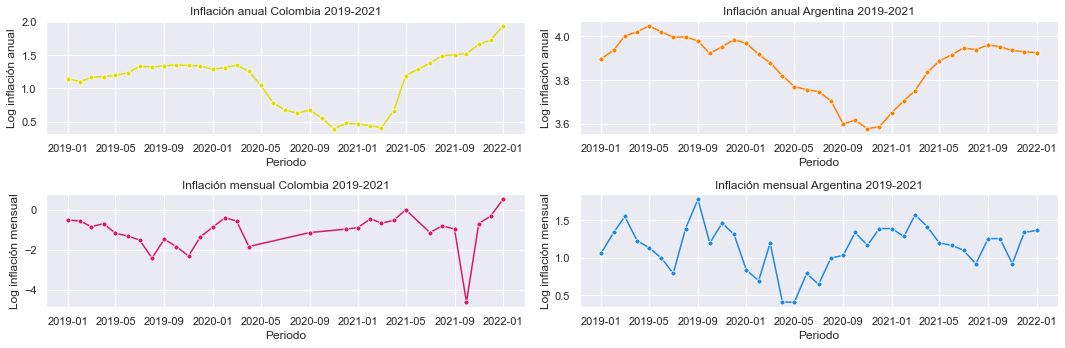

In [124]:
fig1,axes1 = plt.subplots(nrows = 2, ncols = 2, figsize=(15,5))

sns.lineplot(ax=axes1[0,0], data = np.log(info_col["nivel_general_anual"]), marker='o',ms=5,color='#dede00')
axes1[0,0].set_title("Inflación anual Colombia 2019-2021")
axes1[0,0].set_xlabel("Periodo")
axes1[0,0].set_ylabel("Log inflación anual")

sns.lineplot(ax=axes1[0,1], data = np.log(info_arg["nivel_general_anual"]),marker ='o',ms =5,color='#ff7f00')
axes1[0,1].set_title("Inflación anual Argentina 2019-2021")
axes1[0,1].set_xlabel("Periodo")
axes1[0,1].set_ylabel("Log inflación anual")

sns.lineplot(ax=axes1[1,0], data = np.log(info_col["nivel_general_mensual"]),marker ='o',ms =5,color='#D81B60')
axes1[1,0].set_title("Inflación mensual Colombia 2019-2021")
axes1[1,0].set_xlabel("Periodo")
axes1[1,0].set_ylabel("Log inflación mensual")

sns.lineplot(ax=axes1[1,1], data = np.log(info_arg["nivel_general_mensual"]),marker ='o',ms =5,color='#1E88E5')
axes1[1,1].set_title("Inflación mensual Argentina 2019-2021")
axes1[1,1].set_xlabel("Periodo")
axes1[1,1].set_ylabel("Log inflación mensual")

plt.tight_layout()

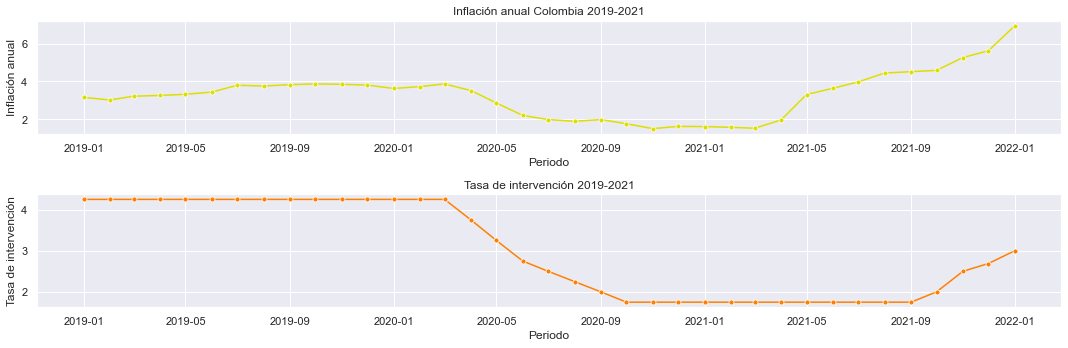

In [125]:
fig2,axes2 = plt.subplots(nrows = 2, ncols = 1, figsize=(15,5))

sns.lineplot(ax=axes2[0], data = info_col["nivel_general_anual"], marker='o',ms=5,color='#dede00')
axes2[0].set_title("Inflación anual Colombia 2019-2021")
axes2[0].set_xlabel("Periodo")
axes2[0].set_ylabel("Inflación anual")

sns.lineplot(ax=axes2[1], data = info_col["tasa_mensual"],marker ='o',ms =5,color='#ff7f00')
axes2[1].set_title("Tasa de intervención 2019-2021")
axes2[1].set_xlabel("Periodo")
axes2[1].set_ylabel("Tasa de intervención")

plt.tight_layout()

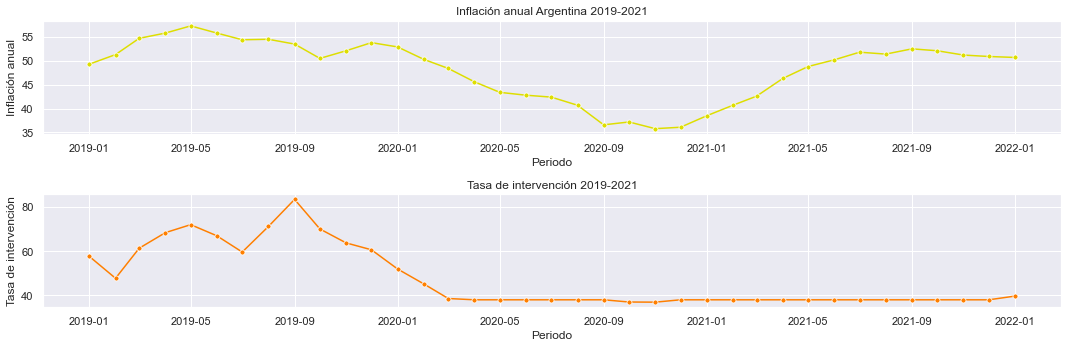

In [126]:
fig3,axes3 = plt.subplots(nrows = 2, ncols = 1, figsize=(15,5))

sns.lineplot(ax=axes3[0], data = info_arg["nivel_general_anual"], marker='o',ms=5,color='#dede00')
axes3[0].set_title("Inflación anual Argentina 2019-2021")
axes3[0].set_xlabel("Periodo")
axes3[0].set_ylabel("Inflación anual")

sns.lineplot(ax=axes3[1], data = info_arg["tasa_mensual"],marker ='o',ms =5,color='#ff7f00')
axes3[1].set_title("Tasa de intervención 2019-2021")
axes3[1].set_xlabel("Periodo")
axes3[1].set_ylabel("Tasa de intervención")

plt.tight_layout()

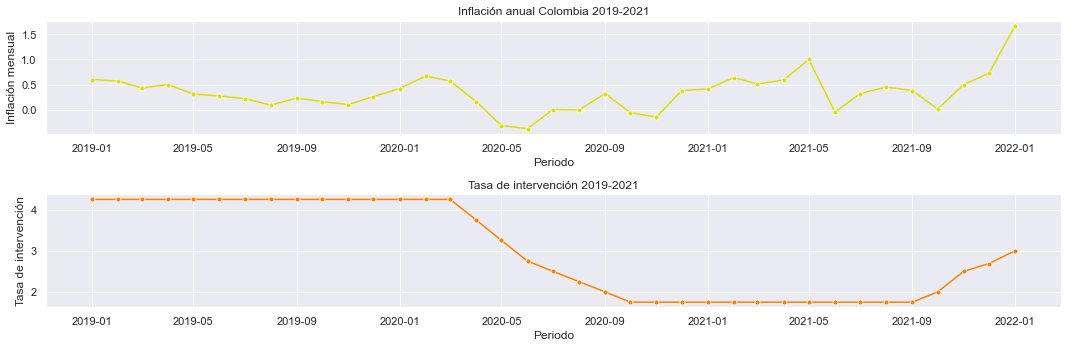

In [127]:
fig4,axes4 = plt.subplots(nrows = 2, ncols = 1, figsize=(15,5))

sns.lineplot(ax=axes4[0], data = info_col["nivel_general_mensual"], marker='o',ms=5,color='#dede00')
axes4[0].set_title("Inflación mensual Colombia 2019-2021")
axes4[0].set_xlabel("Periodo")
axes4[0].set_ylabel("Inflación mensual")

sns.lineplot(ax=axes4[1], data = info_col["tasa_mensual"],marker ='o',ms =5,color='#ff7f00')
axes4[1].set_title("Tasa de intervención 2019-2021")
axes4[1].set_xlabel("Periodo")
axes4[1].set_ylabel("Tasa de intervención")

plt.tight_layout()

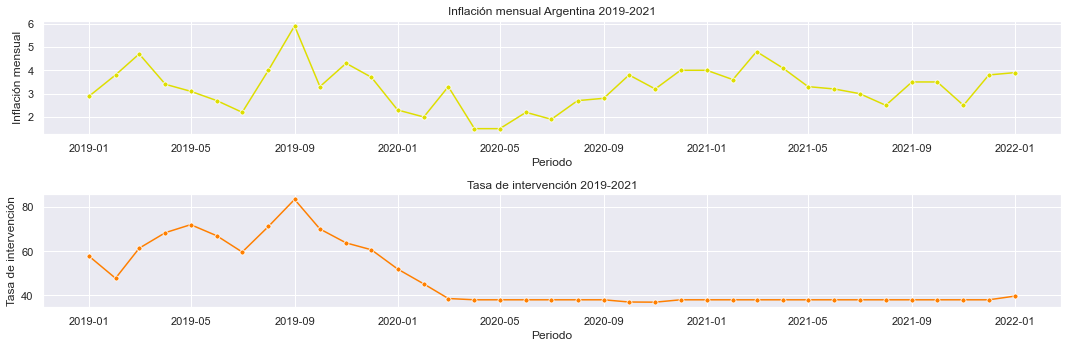

In [128]:
fig5,axes5 = plt.subplots(nrows = 2, ncols = 1, figsize=(15,5))

sns.lineplot(ax=axes5[0], data = info_arg["nivel_general_mensual"], marker='o',ms=5,color='#dede00')
axes5[0].set_title("Inflación mensual Argentina 2019-2021")
axes5[0].set_xlabel("Periodo")
axes5[0].set_ylabel("Inflación mensual")

sns.lineplot(ax=axes5[1], data = info_arg["tasa_mensual"],marker ='o',ms =5,color='#ff7f00')
axes5[1].set_title("Tasa de intervención 2019-2021")
axes5[1].set_xlabel("Periodo")
axes5[1].set_ylabel("Tasa de intervención")

plt.tight_layout()

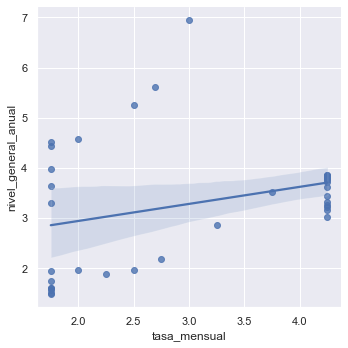

In [143]:
sns.lmplot(x="tasa_mensual",y="nivel_general_anual", data=info_col)

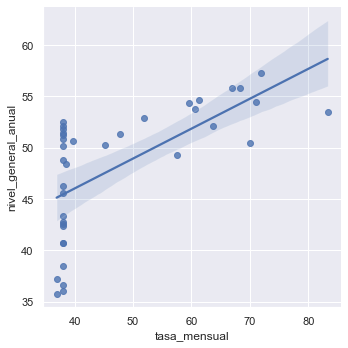

In [142]:
sns.lmplot(x="tasa_mensual",y="nivel_general_anual", data=info_arg)

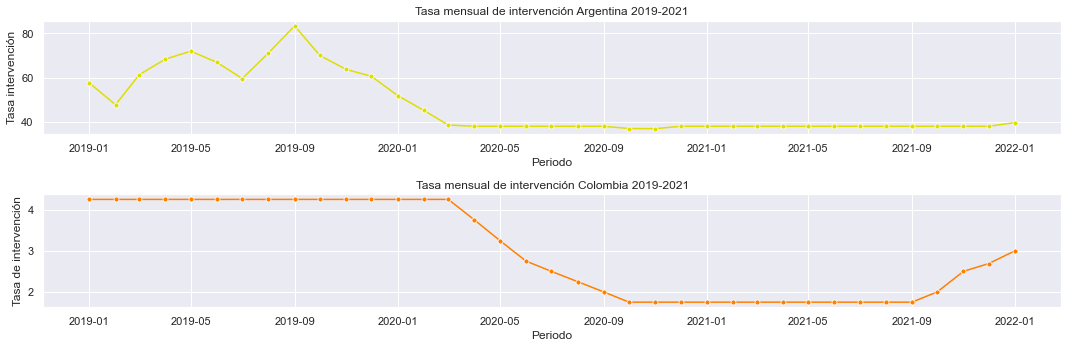

In [145]:
fig6,axes6 = plt.subplots(nrows = 2, ncols = 1, figsize=(15,5))

sns.lineplot(ax=axes6[0], data = info_arg["tasa_mensual"], marker='o',ms=5,color='#dede00')
axes6[0].set_title("Tasa mensual de intervención Argentina 2019-2021")
axes6[0].set_xlabel("Periodo")
axes6[0].set_ylabel("Tasa intervención")

sns.lineplot(ax=axes6[1], data = info_col["tasa_mensual"],marker ='o',ms =5,color='#ff7f00')
axes6[1].set_title("Tasa mensual de intervención Colombia 2019-2021")
axes6[1].set_xlabel("Periodo")
axes6[1].set_ylabel("Tasa de intervención")

plt.tight_layout()

Inflación por divisiones de consumo:
    * Bienes elásticos en inelásticos

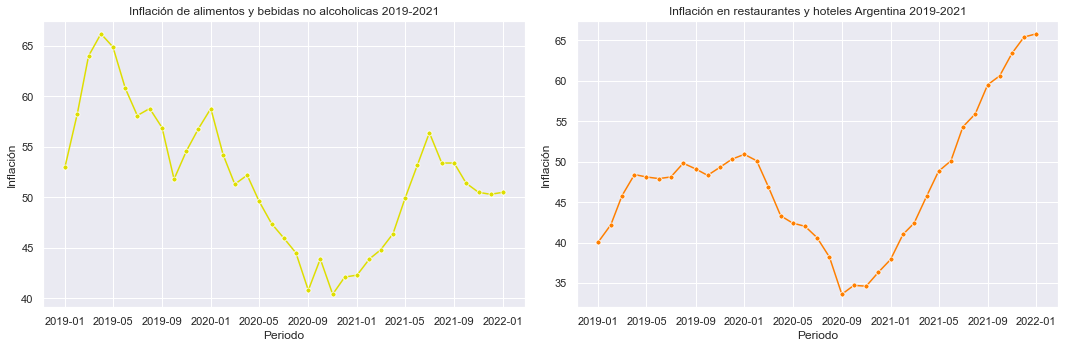

In [149]:
fig7,axes7 = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))

sns.lineplot(ax=axes7[0], data = info_arg["alimentos_bebidas_anual"], marker='o',ms=5,color='#dede00')
axes7[0].set_title("Inflación anual de alimentos y bebidas no alcoholicas Argentina 2019-2021")
axes7[0].set_xlabel("Periodo")
axes7[0].set_ylabel("Inflación")

sns.lineplot(ax=axes7[1], data = info_arg["restaurantes_hoteles_anual"],marker ='o',ms =5,color='#ff7f00')
axes7[1].set_title("Inflación anual en restaurantes y hoteles Argentina 2019-2021")
axes7[1].set_xlabel("Periodo")
axes7[1].set_ylabel("Inflación")

plt.tight_layout()

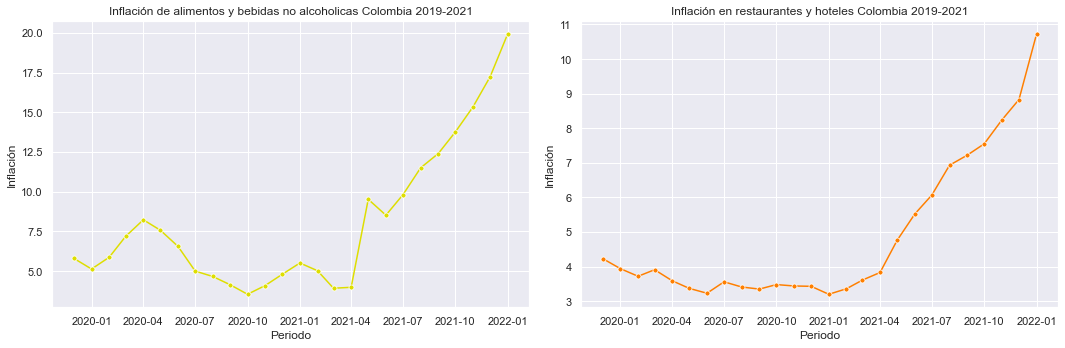

In [151]:
fig8,axes8 = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))

sns.lineplot(ax=axes8[0], data = info_col["alimentos_bebidas_anual"], marker='o',ms=5,color='#dede00')
axes8[0].set_title("Inflación anual de alimentos y bebidas no alcoholicas Colombia 2019-2021")
axes8[0].set_xlabel("Periodo")
axes8[0].set_ylabel("Inflación")

sns.lineplot(ax=axes8[1], data = info_col["restaurantes_hoteles_anual"],marker ='o',ms =5,color='#ff7f00')
axes8[1].set_title("Inflación anual en restaurantes y hoteles Colombia 2019-2021")
axes8[1].set_xlabel("Periodo")
axes8[1].set_ylabel("Inflación")

plt.tight_layout()

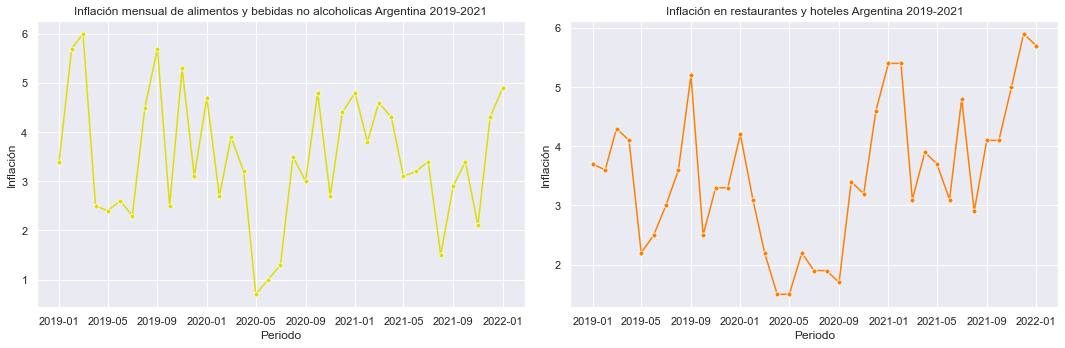

In [154]:
fig8,axes8 = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))

sns.lineplot(ax=axes8[0], data = info_arg["alimentos_bebidas_no_alc_mensual"], marker='o',ms=5,color='#dede00')
axes8[0].set_title("Inflación mensual de alimentos y bebidas no alcoholicas Argentina 2019-2021")
axes8[0].set_xlabel("Periodo")
axes8[0].set_ylabel("Inflación")

sns.lineplot(ax=axes8[1], data = info_arg["restaurantes_hoteles_mensual"],marker ='o',ms =5,color='#ff7f00')
axes8[1].set_title("Inflación en restaurantes y hoteles Argentina 2019-2021")
axes8[1].set_xlabel("Periodo")
axes8[1].set_ylabel("Inflación")

plt.tight_layout()

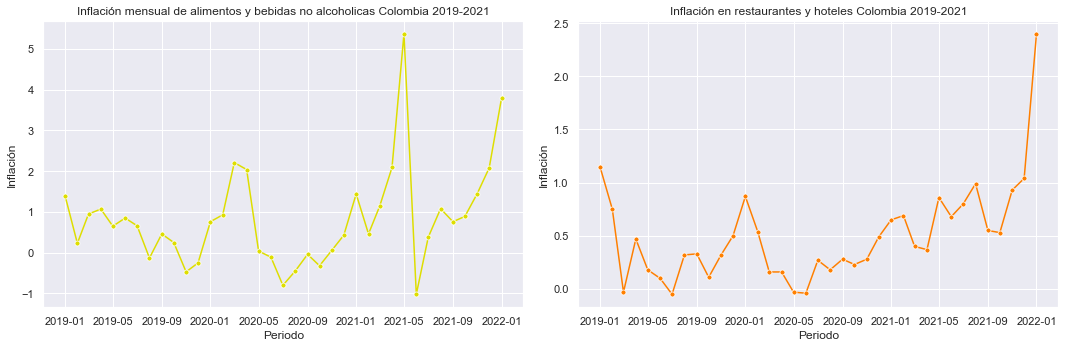

In [159]:
fig9,axes9 = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))

sns.lineplot(ax=axes9[0], data = info_col["alimentos_bebidas_no_alc_mensual"], marker='o',ms=5,color='#dede00')
axes9[0].set_title("Inflación mensual de alimentos y bebidas no alcoholicas Colombia 2019-2021")
axes9[0].set_xlabel("Periodo")
axes9[0].set_ylabel("Inflación")

sns.lineplot(ax=axes9[1], data = info_col["restaurantes_hoteles_mensual"],marker ='o',ms =5,color='#ff7f00')
axes9[1].set_title("Inflación en restaurantes y hoteles Colombia 2019-2021")
axes9[1].set_xlabel("Periodo")
axes9[1].set_ylabel("Inflación")

plt.tight_layout()